# Apartments for sale

We will analyze the data from a real estate agency.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/datasets/real_estate_data_eng.csv',sep='\t')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Conclusion

There are 23699 entries in the dataset, 22 columns. 3 columns are integers, 14 are floats, another 3 are strings and 2 boolians.
Describe method gives us general information about the data (count, mean, min, max, standard deviation)

###  Data preprocessing

Let's check for duplicate rows. In order to find duplicate rows based on all columns we'll use duplicated() method with argument keep=False (that shows both duplicated and original rows)

In [3]:
df[df.duplicated(keep=False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


There are no duplicate rows.

In [4]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

There are 14 columns with missing values. Let's check them.

From describe method we can see that mean=2.77

In [5]:
df['ceiling_height'].median()

2.65

Let's fill missing values in column 'ceiling_height' with median value, using fillna() method.

In [6]:
df['ceiling_height'].fillna('2.65',inplace=True)

After filling missing values with string '2.65' we need to convert it to numeric type. It will allow us to make calculations if needed.

In [7]:
df['ceiling_height']=pd.to_numeric(df['ceiling_height'])

Another column with missing information is 'balcony'. If the user doesn’t enter the number of balconies, then there probably aren’t any. So we will replace NaN values with '0' value.    

In [8]:
df['balcony'].fillna('0',inplace=True)

Also here we need to convert argument into numeric type. Convertion will give as float type. For balconies it's correct use integers. Therefore convert float into integer using astype() 

In [9]:
df['balcony']=pd.to_numeric(df['balcony'])
df['balcony']=df['balcony'].astype(int)

We replaced missing values in ceiling height with median value, in balcony column - with 0 value. Missing information such as: total floors, living and kitchen area, days exposition we couldn't replace with certain number. Therefore we will leave it as it is. Another option to fill such values with something like "No info". Some of the information is received automatically based upon the map data (the distance from the downtown area, airport, the nearest park or body of water).Therefore some missing values were caused by technical errors.

###  Make calculations and add them to the table

Let's add several usefull columns for further analysing the data. 

In [11]:
df['price_per_meter']=df['last_price']/df['total_area']
df['price_per_meter']=df['price_per_meter'].round()

Convert data from a string into the datetime type using the pd.to_datetime() method. Then divide it to three separate columns: day, month and year.

In [12]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d')
df['weekday']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year

Write function that uses floors_total column and gives name to the bottom floor -'first', top floor - "last" and the rest - "other". Later we will use it to analyz relationship between floor and price of apartment.   

In [13]:
def wich_floor(row):
    if row['floor']==1:
        return 'first'
    if row['floor']==row['floors_total']:
        return 'last'
    else:
        return 'other'
df['floor_name']=df.apply(wich_floor,axis=1)

In [14]:
df['ratio_living_total_area']=df['living_area']/df['total_area']

In [15]:
df['ratio_kitchen_total_area']=df['kitchen_area']/df['total_area']

### Exploratory data analysis.

Let's investigate the following parameters: total area, price, number of rooms, and ceiling height.
We'll use hist() to see the distribution of the values and describe() to see the general information.

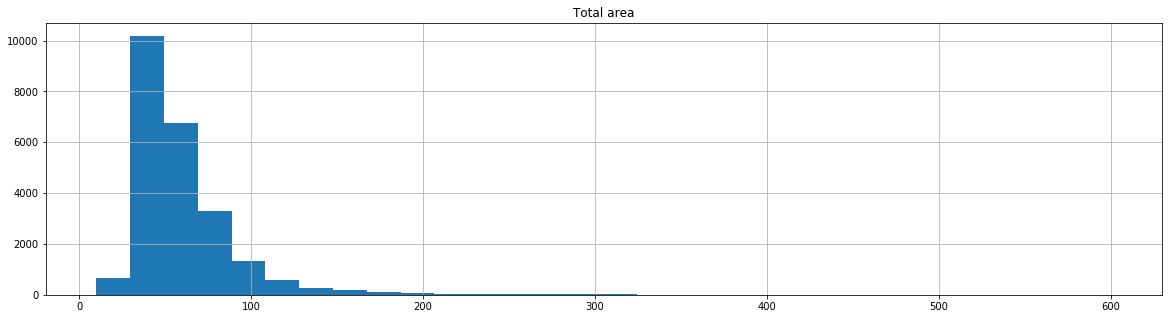

In [16]:
df['total_area'].hist(bins=30,range=(10,600),figsize=(20,5));
plt.title('Total area');

There are two wide peaks between 30 and 70 sq.m.. There aren't many values after 100 sq.m. And a few after 200 till 900 sq.m..

In [17]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

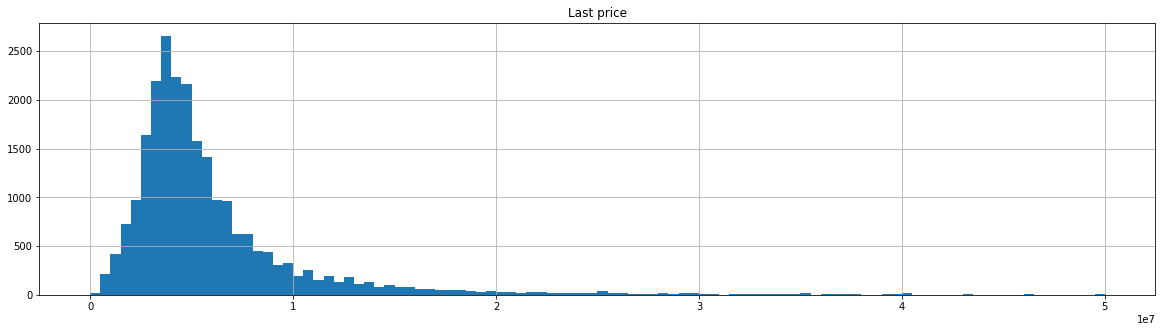

In [18]:
df['last_price'].hist(bins=100,range=(0, 50000000),figsize=(20,5));
plt.title('Last price');

We see growing distribution till point 'last_price'= 5 mil rub and then decreasing. 
There is a long tail till 763 mil rub max price.

In [19]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Let's look at the number of rooms.

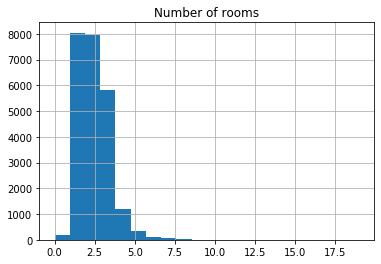

In [20]:
df['rooms'].hist(bins=20);
plt.title('Number of rooms');

Most of the values represented by 1 and 2 rooms. A bit less 3 rooms. About 5% of the data is 4 rooms. A few 5 rooms, 0 rooms (studios), 6 rooms and go on till 19 rooms. 

In [21]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Now look at column 'ceiling_height'.

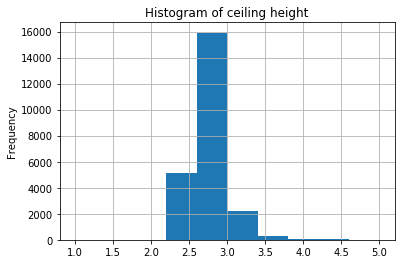

In [22]:
df['ceiling_height'].plot(kind='hist',bins=10, range=(1,5),grid=True,title='Histogram of ceiling height');

About 5000 values in the range between 2.20 and 2.60 m ceiling height. The bigest amount of values fall in the range from 2.6 till 3.0 m 

In [23]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Let's examine the time it takes to sell the apartment.

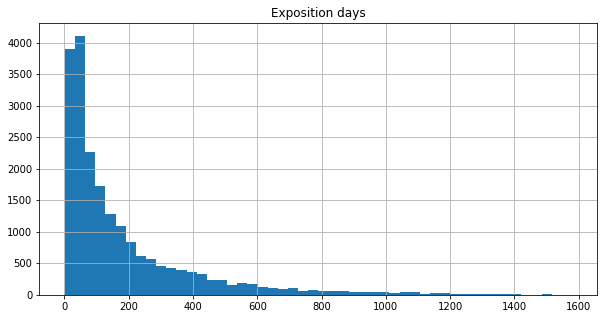

In [24]:
df['days_exposition'].hist(bins=50, figsize=(10,5));
plt.title('Exposition days');

In [25]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [26]:
df['days_exposition'].median(),df['days_exposition'].mean()

(95.0, 180.88863436982163)

Mean is about twice bigger then median. The reason for this is existance of outliers that push the mean to higher value. Analysing this column we should use median, not mean. So it usually takes about 95 days to complete a sale. 
Saleing a property after 1 day could be considered as extremely quick (for example, if a property is good and a price is low). 
however, saleing a property after 4 years could be considered as extremely slow ( a price is too high, bad location)

Let's look at rare and outlying values. 

For this purpose use boxplot.

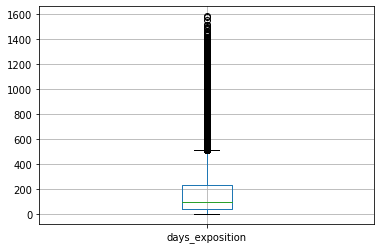

In [27]:
df.boxplot(['days_exposition']);

According to the boxplot properties that were sold after about year and a half are outliers. In my opinion these values shouldn't be removed from the data. Because they are in the data not by mistake, but there are possible reasons for such values (high price, bad location, the size of the property) 

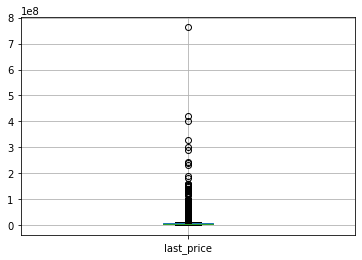

In [28]:
df.boxplot(['last_price']);

Considering data in column 'last_price', I wouldn't remove even the most noticeable outlier such as 763,000,000 rub housing price. Because it's a large property in the center of the City, must be in very good condition.  

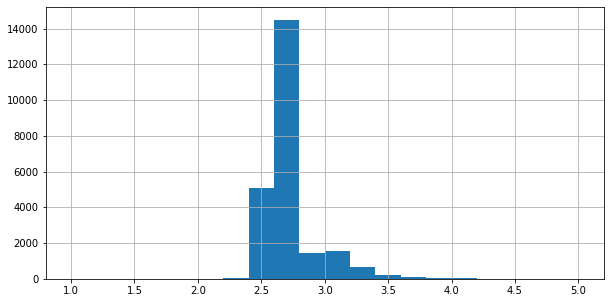

In [29]:
df['ceiling_height'].hist(bins=20,range=(1,5),figsize=(10,5));

In [30]:
len(df.query('ceiling_height<2' and 'ceiling_height>10'))

25

Properties with ceiling height less then 2.00 m and more then 10.00 m are outliers. It seems like typing mistake made by user. There are 25 such values. We will take it an account analysing relationship between ceiling height and housing price. 

Let's analyze some factors and their influence on an apartment’s price. 
Build scatter plot to see the relationship between total area and housing price.

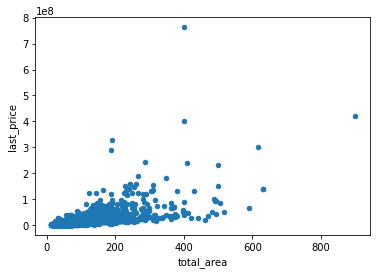

In [31]:
df.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter');

In [32]:
df['total_area'].corr(df['last_price'])

0.6536750579657244

Correlation coefficient = 0.65 means a moderate positive relationship between total area and housing price.

Let's create new column with total area cutted into intervals. New column let us keep original values in total_area column untouched. 
We'll do the same for 'rooms' and 'cityCenters_nearest' columns.
We'll eximne mean, median and count.

In [33]:
df['total_area_cut']=pd.cut(df['total_area'],[0,30,40,50,70,100,900])
df.groupby('total_area_cut')['last_price'].agg(['count','mean','median'])

,count,mean,median
total_area_cut,,,
"(0, 30]",899,2.698226e+06,2740000.0
"(30, 40]",5143,3.426824e+06,3400000.0
"(40, 50]",5172,4.064097e+06,4000000.0
"(50, 70]",6747,5.450266e+06,5270000.0
"(70, 100]",3902,8.570743e+06,7800000.0
"(100, 900]",1836,2.382506e+07,15784217.5


   The bigger property the higher price.

In [34]:
df.groupby('rooms')['last_price'].agg(['count','mean','median'])

,count,mean,median
rooms,,,
0,197,3.337724e+06,2700000.0
1,8047,3.835362e+06,3600000.0
2,7940,5.591605e+06,4770169.0
3,5814,8.179119e+06,6200000.0
4,1180,1.342350e+07,9000000.0
5,326,2.376208e+07,14000000.0
6,105,3.170975e+07,19000000.0
7,59,5.147007e+07,24900000.0
8,12,5.022417e+07,23095000.0


Let's divide the number of rooms into 4 groups and analyze them.

In [35]:
df['rooms_cut']=pd.cut(df['rooms'],[0,1,2,4,19])
df.groupby('rooms_cut')['last_price'].agg(['count','mean','median'])

,count,mean,median
rooms_cut,,,
"(0, 1]",8047,3.835362e+06,3600000.0
"(1, 2]",7940,5.591605e+06,4770169.0
"(2, 4]",6994,9.063929e+06,6500000.0
"(4, 19]",521,3.016701e+07,16500000.0


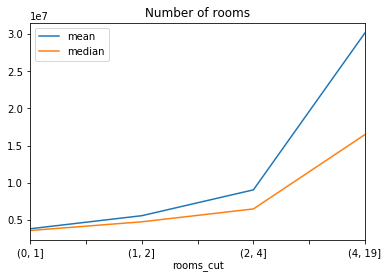

In [36]:
df.groupby('rooms_cut')['last_price'].agg(['mean','median']).plot();
plt.title('Number of rooms');

The more rooms the higher housing price. Usually, the more rooms the bigger total area of the property and like we see from the previuos conclusion the higher price.
It would be good to have more appartments with more then 4 rooms to analyze this group (4,19] (we have only 521 entries). 

In [37]:
df.groupby('floor_name')['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_name,,,
first,2917,4.803560e+06,3900000.0
last,3336,7.361025e+06,4300000.0
other,17446,6.675444e+06,4850000.0


Let's consider only data for top and bottom floor and look at median. Last floor is about 10% more expencive then the first floor. 

In [38]:
df.groupby('cityCenters_nearest')['last_price'].agg(['count','mean','median'])

,count,mean,median
cityCenters_nearest,,,
181.0,1,31099000.0,31099000.0
208.0,1,5800000.0,5800000.0
215.0,1,10990000.0,10990000.0
287.0,1,9590000.0,9590000.0
291.0,1,11500000.0,11500000.0
...,...,...,...
64857.0,1,3650000.0,3650000.0
65105.0,1,3300000.0,3300000.0
65764.0,1,4000000.0,4000000.0


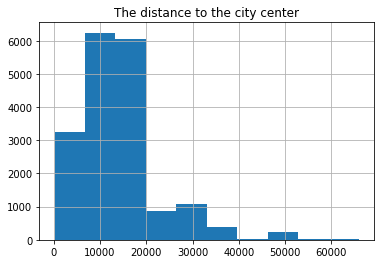

In [39]:
df['cityCenters_nearest'].hist();
plt.title('The distance to the city center');

In [40]:
df['cityCenters_nearest_cut']=pd.cut(df['cityCenters_nearest'],[0,10000,15000,20000,66000])
df.groupby('cityCenters_nearest_cut')['last_price'].agg(['count','mean','median'])

,count,mean,median
cityCenters_nearest_cut,,,
"(0, 10000]",5097,1.274840e+07,8200000.0
"(10000, 15000]",6759,5.993269e+06,5000000.0
"(15000, 20000]",3692,5.277714e+06,4600000.0
"(20000, 66000]",2632,4.826921e+06,4100000.0


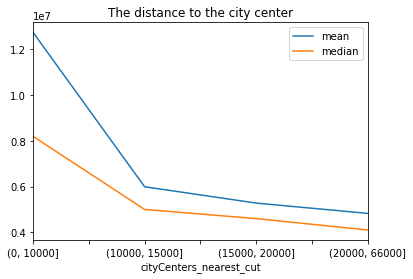

In [41]:
df.groupby('cityCenters_nearest_cut')['last_price'].agg(['mean','median']).plot();
plt.title('The distance to the city center');

Proximity to the city center raises the price of the property.

Let's eximine the correlation to the publication date: day of the week, month, and year.
We'll use scatter plot, coor() method and build bar plot. 

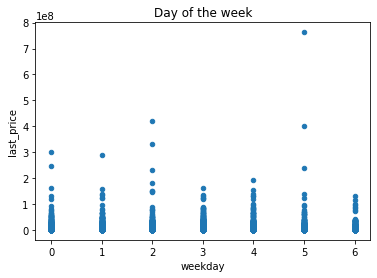

In [42]:
df.sort_values('weekday').plot(x='weekday', y='last_price', kind='scatter');
plt.title('Day of the week');

According to the scatter plot there is no correlation between publication day and appartment's price. 

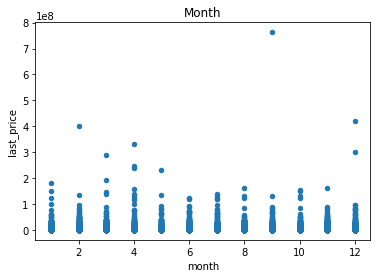

In [44]:
df.sort_values('month').plot(x='month', y='last_price', kind='scatter');
plt.title('Month');

According to the scatter plot there is no correlation between month of publication  and appartment's price. 

In [46]:
df.groupby('year')['last_price'].agg(['count'])

,count
year,
2014,137
2015,1191
2016,2783
2017,8190
2018,8519
2019,2879


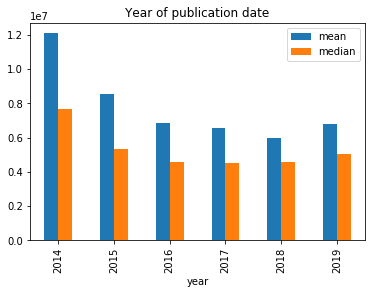

In [47]:
df.groupby('year')['last_price'].agg(['mean','median']).plot.bar();
plt.title('Year of publication date');

137 values for 2014 is not enough to make conclusions. 
There is no correletion between year of advertising and apartment's price.

Let's group our data by locality name and count how many ads was published for each group. Then sort these values in descending order and choose 10 first rows.

In [48]:
df_10=df.groupby('locality_name')['first_day_exposition'].count().sort_values(ascending=False).head(10)
df_10=df_10.reset_index()
df_10

,locality_name,first_day_exposition
0,Saint Peterburg,15721
1,Murino village,556
2,Shushary village,440
3,Vsevolozhsk,398
4,Pushkin,369
5,Kolpino,338
6,Pargolovo village,327
7,Gatchina,307
8,Kudrovo village,299
9,Vyborg,237


Creat pivot table for locality name with average price per meter values.

In [49]:
df_local=df.pivot_table(index='locality_name',values='price_per_meter')
df_local=df_local.reset_index()
df_local

,locality_name,price_per_meter
0,Lesnoye village,36734.000000
1,60 km village,25617.000000
2,Agalatovo village,71214.750000
3,Aleksandrovskaya village,70262.500000
4,Annino village,63322.625000
...,...,...
336,village Vazhiny,20684.333333
337,village Veshchevo,28259.500000
338,village Villozi,56902.333333
339,village Vozrozhdeniye,26720.500000


Let's merge both data frames on locality name. As a result we'll get three columns: locality name, number of ads and price per meter. Then sort values in descending order and choose the top 1 and the botom 1. 

In [50]:
df_10_localities=df_10.merge(df_local,on='locality_name')
df_10_localities.columns=['name','number_of_ads','price_per_meter']
df_10_localities.sort_values(by='price_per_meter',ascending=False)
df_10_localities.head(1)

,name,number_of_ads,price_per_meter
0,Saint Peterburg,15721,114849.005788


In [51]:
df_10_localities.tail(1)

,name,number_of_ads,price_per_meter
9,Vyborg,237,58141.919831


Saint Peterburg's appartments have the highest price per square meter. 
Vyborg's appartments have the lowest price per square meter.

Now let's decide which area is considered to be downtown. In order to do that, we'll create a column with the distance to the city center in km and round to the nearest whole number. Then calculate the average price per square meter for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Then we"ll find a place on the graph where it shifts significantly. It would be the downtown border.

First, we'll choose only apartments in Saint Peterburg.

In [52]:
df_spb=df.query('locality_name=="Saint Peterburg"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_meter,weekday,month,year,floor_name,ratio_living_total_area,ratio_kitchen_total_area,total_area_cut,rooms_cut,cityCenters_nearest_cut
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,120370.0,3,3,2019,other,0.472222,0.231481,"(100, 900]","(2, 4]","(15000, 20000]"
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,92786.0,3,8,2015,other,0.612500,0.148214,"(50, 70]","(1, 2]","(10000, 15000]"
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,408176.0,4,7,2015,other,NaN,NaN,"(100, 900]","(2, 4]","(0, 10000]"
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,100000.0,1,6,2018,other,0.320000,0.410000,"(70, 100]","(1, 2]","(0, 10000]"
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,110545.0,3,4,2019,other,NaN,0.263966,"(70, 100]","(1, 2]","(10000, 15000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,100567.0,2,2,2018,other,0.461756,0.257790,"(30, 40]","(0, 1]","(15000, 20000]"
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,NaN,...,105769.0,3,7,2018,other,0.596154,0.115385,"(50, 70]","(1, 2]","(0, 10000]"
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,129904.0,3,10,2016,other,0.552812,0.145405,"(70, 100]","(1, 2]","(0, 10000]"
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,72491.0,1,3,2017,other,0.547792,0.103356,"(100, 900]","(2, 4]","(0, 10000]"


In [53]:
df_spb['cityCenters_nearest_km']=df_spb['cityCenters_nearest']/1000
df_spb['cityCenters_nearest_km']=df_spb['cityCenters_nearest_km'].round()
df_spb['cityCenters_nearest_km']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        16.0
2        14.0
3         7.0
4         8.0
7        12.0
         ... 
23689    16.0
23690     6.0
23691     4.0
23694     4.0
23697    10.0
Name: cityCenters_nearest_km, Length: 15721, dtype: float64

In [54]:
df_spb.groupby('cityCenters_nearest_km')['price_per_meter'].mean()

cityCenters_nearest_km
0.0     245833.518519
1.0     177005.395833
2.0     157848.983871
3.0     121387.442857
4.0     133282.873547
5.0     140509.786957
6.0     151012.189320
7.0     156176.866667
8.0     125671.440536
9.0     113131.025295
10.0    112727.527121
11.0    108630.835314
12.0    107488.737072
13.0    108148.128346
14.0    104252.383112
15.0    104231.974490
16.0    100542.608696
17.0     96597.647792
18.0     96362.287356
19.0     98652.687898
20.0    103045.142857
21.0     94469.564103
22.0     91330.405941
23.0     91828.541176
24.0     85736.884615
25.0     91531.346154
26.0     89285.867925
27.0    132115.500000
28.0     81161.857143
29.0     72953.500000
Name: price_per_meter, dtype: float64

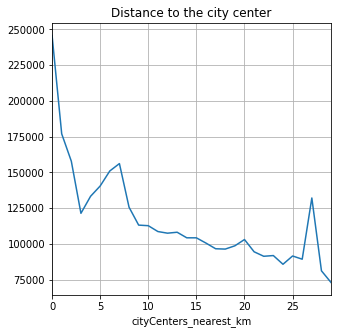

In [55]:
df_spb.groupby('cityCenters_nearest_km')['price_per_meter'].mean().plot(figsize=(5,5),grid=True);
plt.title('Distance to the city center');

The downtown border is point of 7 km distance to the city center. After this point the price per square meter going down. 
We see that in the range 0-3 km the price per square meter goes down, then goes up till point 7 km. Possible reason for price droping down could be appartments in old unrenovated buildings. Futher from the nearest city center (after 3 km) but still in the center (up to 7 km) there are more new or renovated buildings that push the price up again. 

Now we'll select all the apartments in the downtown and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment's price: number of rooms, floor, distance to the downtown area, and ad publication date.
We'll do the same process as above.

In [56]:
df_downtown=df_spb.query('cityCenters_nearest_km<7.00')

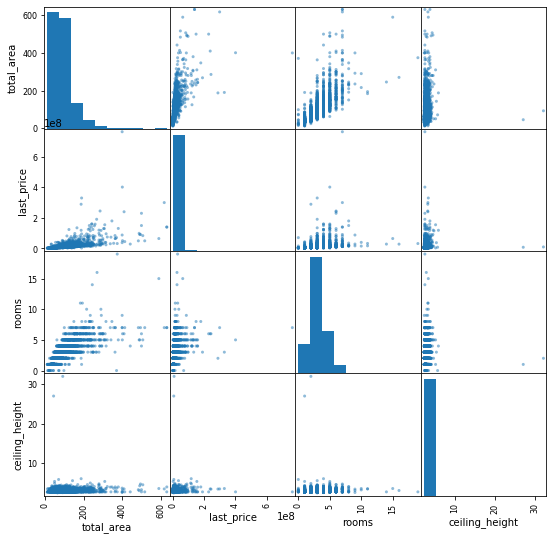

In [57]:
df_downtown_corr=df_downtown[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(df_downtown_corr, figsize=(9, 9));

In [58]:
df_downtown_corr[['total_area','last_price','rooms','ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.604669,0.735232,0.113144
last_price,0.604669,1.000000,0.303971,0.061705
rooms,0.735232,0.303971,1.000000,0.083890
ceiling_height,0.113144,0.061705,0.083890,1.000000


According to correlation matrix and scatter plot for all values, there is a moderate positive relationship between total area and housing price. The price goes up with growing number of rooms till 7 rooms, then price goes down. The height of ceiling doesn't influence housing price. 

In [59]:
df_downtown.groupby('floor_name')['last_price'].agg(['count','mean','median'])

,count,mean,median
floor_name,,,
first,353,9.363418e+06,6800000.0
last,567,1.868913e+07,9500000.0
other,2185,1.482799e+07,9800000.0


Last floor more expensive then first floor.

In [60]:
df_downtown.groupby('cityCenters_nearest_km')['last_price'].agg(['count','mean','median'])

,count,mean,median
cityCenters_nearest_km,,,
0.0,27,3.144912e+07,17900000.0
1.0,192,2.120672e+07,11395000.0
2.0,310,1.778832e+07,10000000.0
3.0,350,1.112658e+07,8409000.0
4.0,688,1.330428e+07,9200000.0
5.0,920,1.449912e+07,9500000.0
6.0,618,1.533842e+07,8900000.0


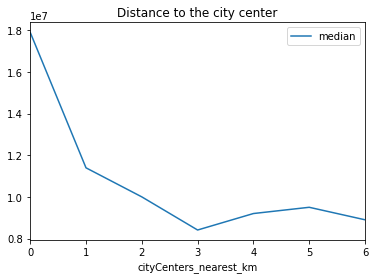

In [61]:
df_downtown.groupby('cityCenters_nearest_km')['last_price'].agg(['median']).plot();
plt.title('Distance to the city center');

The far from the center city the price going down. 
About price inrease after 3 km were explained above.

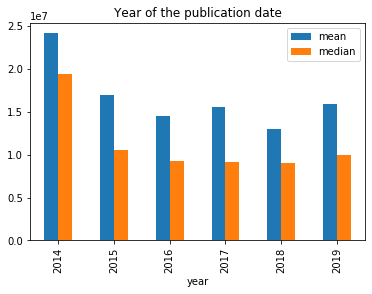

In [62]:
df_downtown.groupby('year')['last_price'].agg(['mean','median']).plot.bar();
plt.title('Year of the publication date');

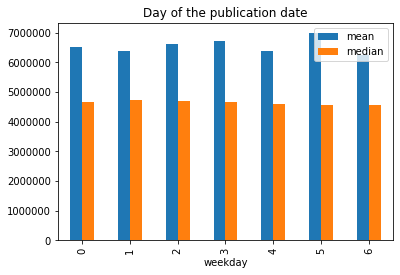

In [63]:
df.groupby('weekday')['last_price'].agg(['mean','median']).plot.bar();
plt.title('Day of the publication date');

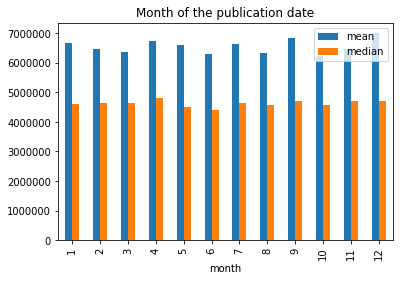

In [64]:
df.groupby('month')['last_price'].agg(['mean','median']).plot.bar();
plt.title('Month of the publication date');

There is no relationship between publication date and housing price.

Analysing data for downtown were discovered that housing price increases with increasing total area of the appartment and also with proximity to the city center. Last floor is more expensive then first floor. But it doesn't matter if ceiling is high or less high.  

### Overall conclusion

The data were analyzed in two ways: examining data for the entire city and only for the downtown. 
Such relationships were discovered for the entire city:

* the bigger total area of the appartment the higher housing price
* the closer to downtown the higher apartment's price
* top floor is more expensive then first floor
* there is no relationship between publication date and housing price
* cieling height doesn't have influence on apartment's price

Same conclutions took place for downtown.